<a href="https://colab.research.google.com/github/srtaksande/MachineLearning/blob/main/Linear%20discriminant%20analysis(LDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LDA will be applied to the same corpus of  documents as shown in the Session ppt

WORKFLOW

STEP 1:

After importing the required libraries, we will compile all the documents into one list to have the corpus.

In [ ]:
# for text preprocessing
import re
import spacy

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

# import numpy for matrix operation
import numpy as np

# Importing Gensim
import gensim
from gensim import corpora

In [ ]:
# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
D1 = 'I want to watch a movie this weekend.'
D2 =  'I went shopping yesterday. New Zealand won the World Test Championship by beating India by eight wickets at Southampton.'
D3 =  'I don’t watch cricket. Netflix and Amazon Prime have very good movies to watch.'
D4 =  'Movies are a nice way to chill however, this time I would like to paint and read some good books. It’s been long!'
D5 =  'This blueberry milkshake is so good! Try reading Dr. Joe Dispenza’s books. His work is such a game-changer! His books helped to learn so much about how our thoughts impact our biology and how we can all rewire our brains.'

In [ ]:
# combining all the documents into a list:

corpus = [D1, D2, D3, D4, D5]
corpus

['I want to watch a movie this weekend.',
 'I went shopping yesterday. New Zealand won the World Test Championship by beating India by eight wickets at Southampton.',
 'I don’t watch cricket. Netflix and Amazon Prime have very good movies to watch.',
 'Movies are a nice way to chill however, this time I would like to paint and read some good books. It’s been long!',
 'This blueberry milkshake is so good! Try reading Dr. Joe Dispenza’s books. His work is such a game-changer! His books helped to learn so much about how our thoughts impact our biology and how we can all rewire our brains.']

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

. **Text Preprocessing**

Steps to preprocess text data:

*   Convert the text into lowercase
*   Split text into words
*   Remove the stop loss words
*   Remove the Punctuation, any symbols and special characters
*   Normalize the word (I'll be using Lemmatization for normalization)

In [ ]:
# Apply Preprocessing on the Corpus

# stop loss words
stop = set(stopwords.words('english'))

# punctuation
exclude = set(string.punctuation)

# lemmatization
lemma = WordNetLemmatizer()

# One function for all the steps:
def clean(doc):

    # convert text into lower case + split into words
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])

    # remove any stop words present
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)

    # remove punctuations + normalize the text
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

# clean data stored in a new list
clean_corpus = [clean(doc).split() for doc in corpus]

In [ ]:
clean_corpus

[['want', 'watch', 'movie', 'weekend'],
 ['went',
  'shopping',
  'yesterday',
  'new',
  'zealand',
  'world',
  'test',
  'championship',
  'beating',
  'india',
  'eight',
  'wicket',
  'southampton'],
 ['don’t',
  'watch',
  'cricket',
  'netflix',
  'amazon',
  'prime',
  'good',
  'movie',
  'watch'],
 ['movie',
  'nice',
  'way',
  'chill',
  'however',
  'time',
  'would',
  'like',
  'paint',
  'read',
  'good',
  'book',
  'it’s',
  'long'],
 ['blueberry',
  'milkshake',
  'good',
  'try',
  'reading',
  'dr',
  'joe',
  'dispenza’s',
  'book',
  'work',
  'gamechanger',
  'book',
  'helped',
  'learn',
  'much',
  'thought',
  'impact',
  'biology',
  'rewire',
  'brain']]

**3. Creating Document Term Matrix**

Using gensim for Document Term Matrix(DTM), we don't need to create the DTM matrix from scratch explicitly. The gensim library has internal mechanism to create the DTM.

The only requirement for gensis package is we need to pass the cleaned data in the form of tokenized words.

In [ ]:
# Creating the term dictionary of our courpus that is of all the words (Sepcific to Genism syntax perspective),
# where every unique term is assigned an index.

dict_ = corpora.Dictionary(clean_corpus)

print(dict_)

Dictionary(52 unique tokens: ['movie', 'want', 'watch', 'weekend', 'beating']...)


Now, the next step is to convert the corpus (the list of documents) into a document-term Matrix using the dictionary that we had prepared above. (The vectorizer used here is the Bag of Words).

In [ ]:
# Converting list of documents (corpus) into Document Term Matrix using the dictionary
doc_term_matrix = [dict_.doc2bow(i) for i in clean_corpus]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1)],
 [(0, 1), (2, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)],
 [(0, 1),
  (20, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1)],
 [(20, 1),
  (23, 2),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1)]]

The output implies:

Document wise we have the index of the word and its frequency.
The 0th word is repeated 1 time, then the 1st word repeated 1 and so on .

**LDA Implementation**

In [ ]:
# Creating the object for LDA model using gensim library

Lda = gensim.models.ldamodel.LdaModel

In [ ]:
# Running and Training LDA model on the document term matrix.

ldamodel = Lda(doc_term_matrix, num_topics=8, id2word = dict_, passes=1, random_state=0, eval_every=None)

In [ ]:
# Prints the topics with the indexes: 0,1,2 :

ldamodel.print_topics()

# we need to manually check whethere the topics are different from one another or not

[(0,
  '0.137*"watch" + 0.073*"movie" + 0.073*"good" + 0.073*"amazon" + 0.073*"netflix" + 0.073*"prime" + 0.073*"cricket" + 0.073*"don’t" + 0.008*"want" + 0.008*"weekend"'),
 (1,
  '0.019*"watch" + 0.019*"movie" + 0.019*"want" + 0.019*"don’t" + 0.019*"weekend" + 0.019*"good" + 0.019*"book" + 0.019*"cricket" + 0.019*"prime" + 0.019*"new"'),
 (2,
  '0.038*"eight" + 0.038*"india" + 0.038*"beating" + 0.038*"zealand" + 0.038*"southampton" + 0.038*"went" + 0.038*"test" + 0.038*"yesterday" + 0.038*"shopping" + 0.038*"championship"'),
 (3,
  '0.019*"movie" + 0.019*"watch" + 0.019*"want" + 0.019*"weekend" + 0.019*"good" + 0.019*"book" + 0.019*"prime" + 0.019*"don’t" + 0.019*"cricket" + 0.019*"championship"'),
 (4,
  '0.055*"movie" + 0.055*"long" + 0.055*"book" + 0.055*"paint" + 0.055*"read" + 0.055*"time" + 0.055*"chill" + 0.055*"like" + 0.055*"however" + 0.055*"would"'),
 (5,
  '0.107*"weekend" + 0.107*"watch" + 0.107*"movie" + 0.107*"want" + 0.012*"good" + 0.012*"don’t" + 0.012*"book" + 0.012

The above output means: each of the 52 unique words are given weights based on the topics.This implies which of the words dominate the topics.

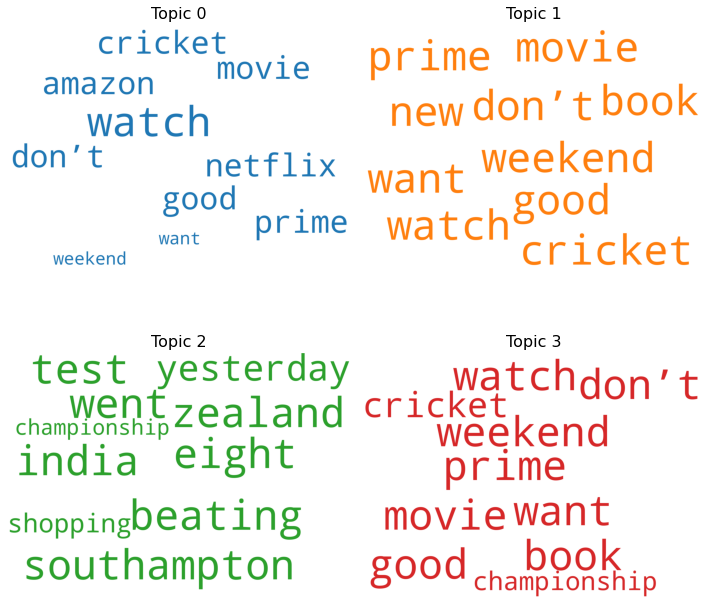

In [ ]:
# Wordcloud of Top N words in each topic

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

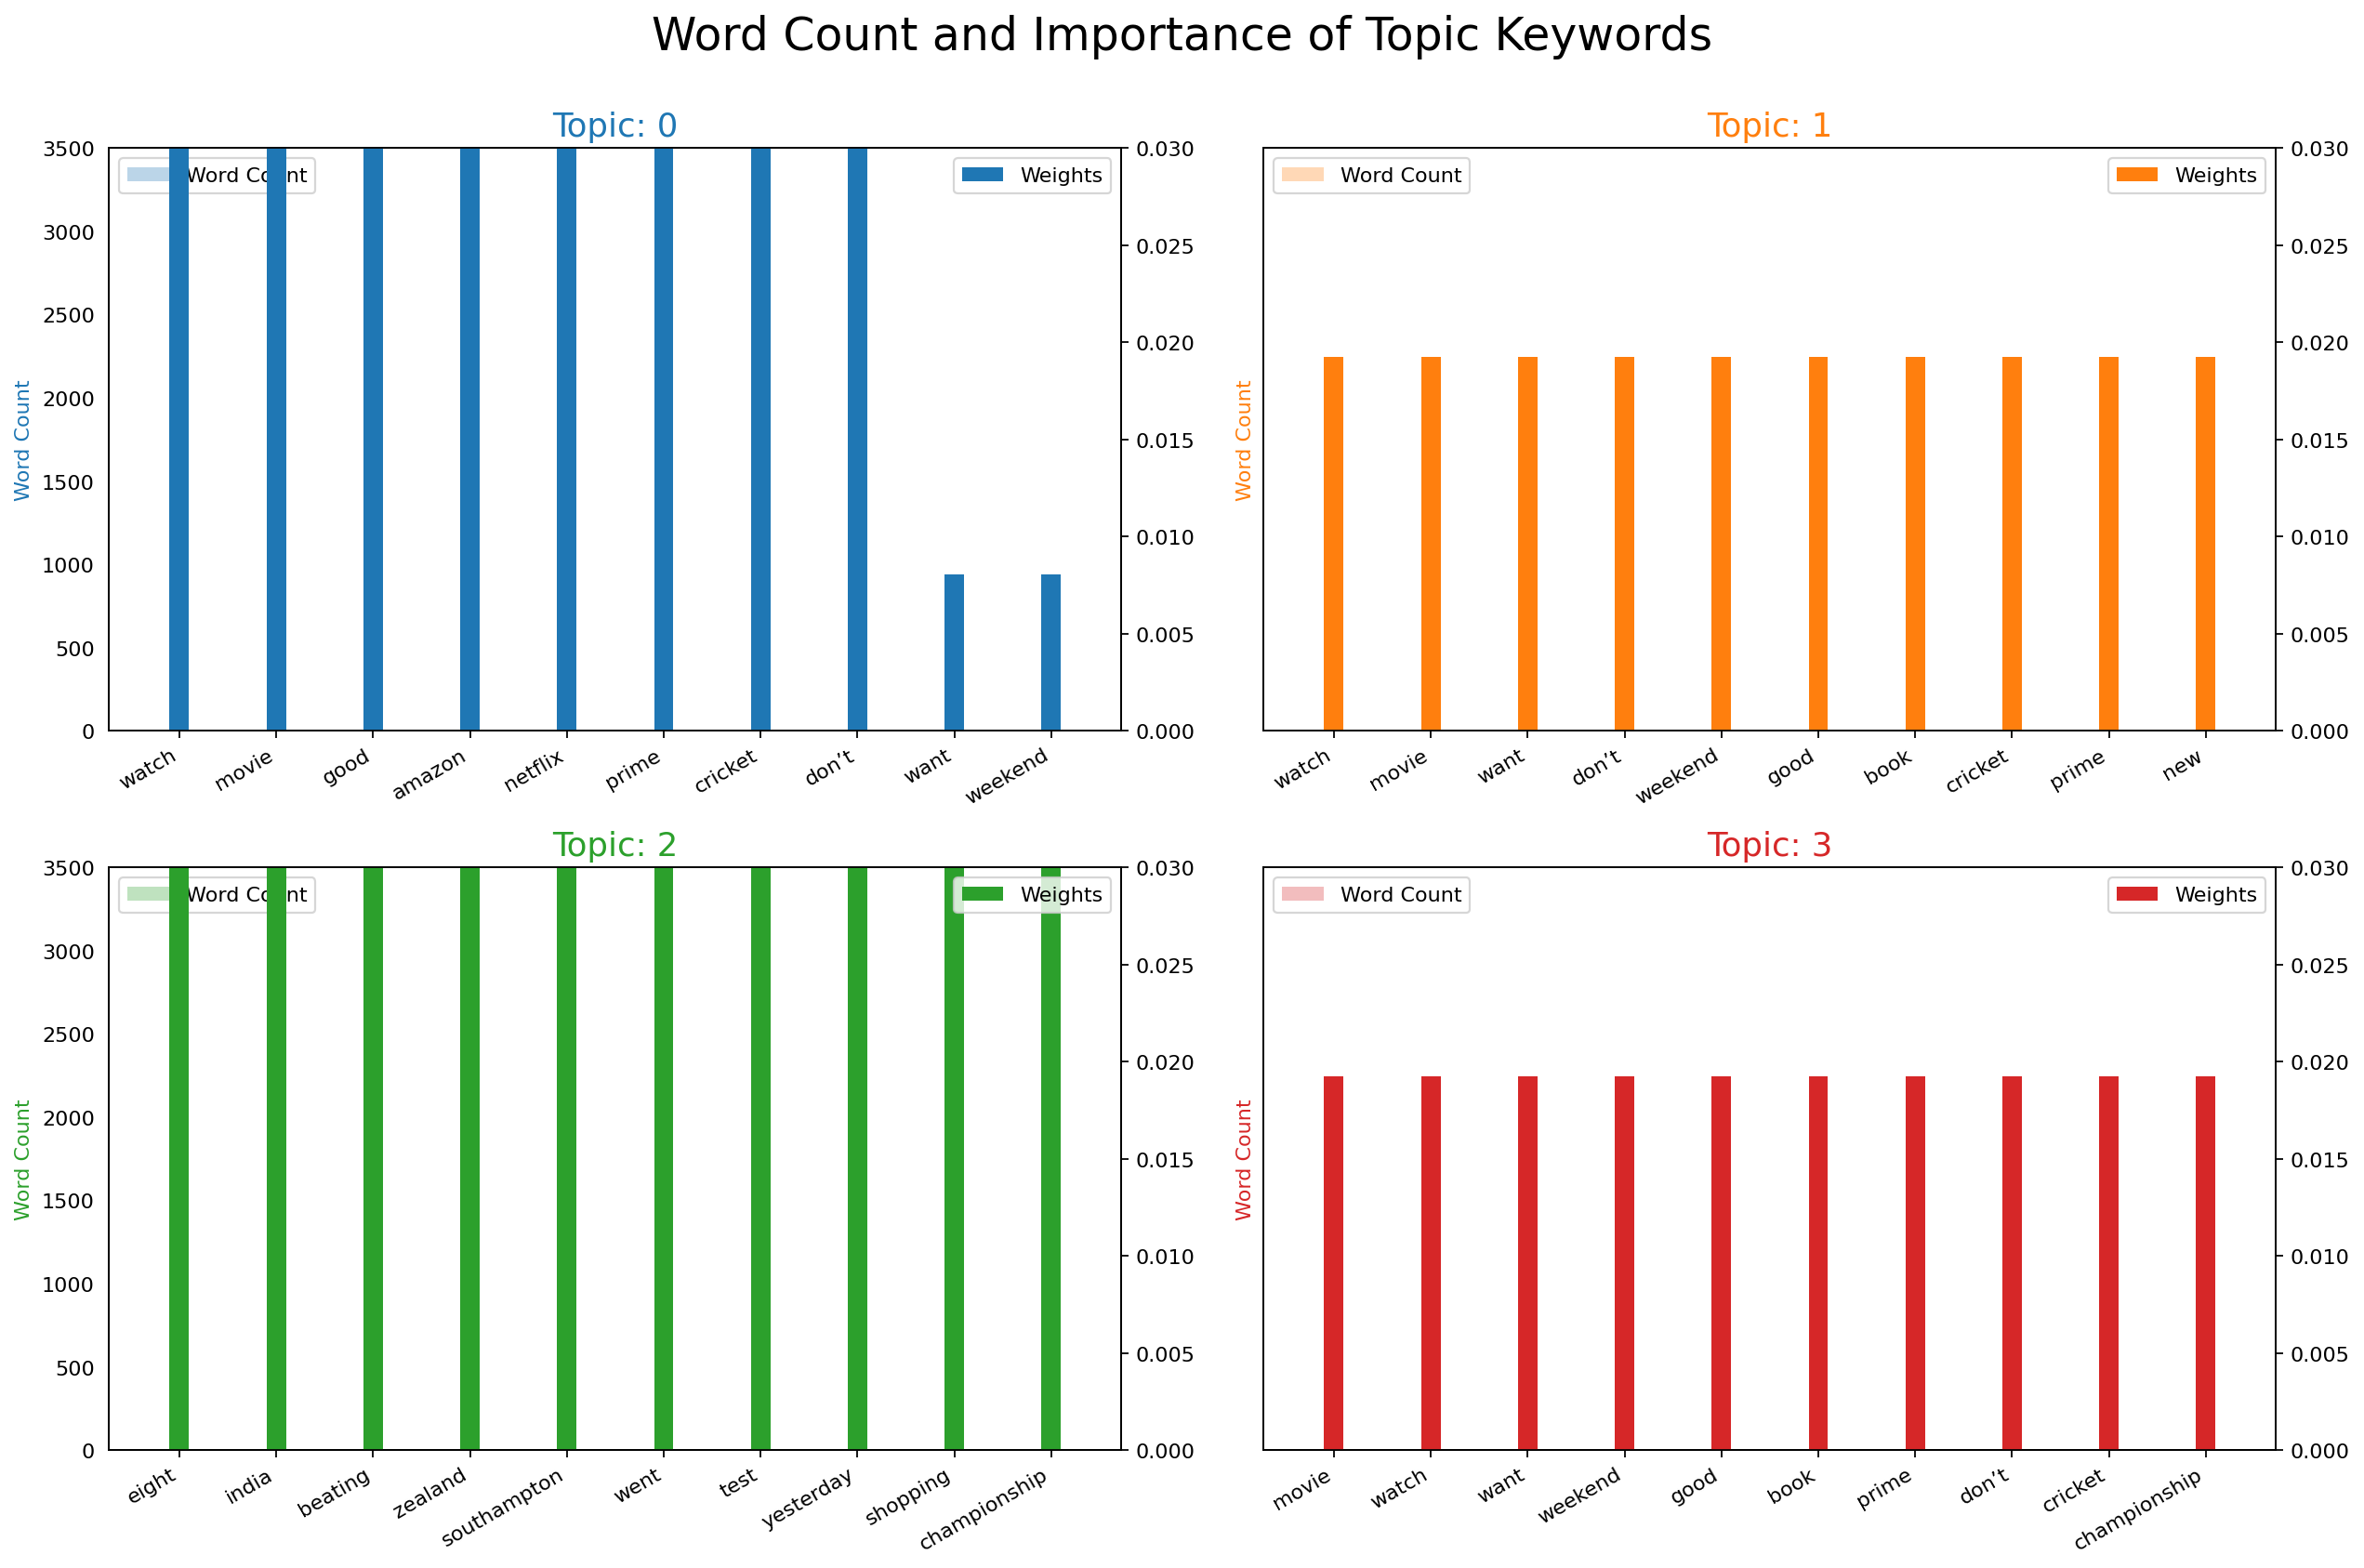

In [ ]:
import pandas as pd
from collections import Counter
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in clean_corpus for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)
plt.show()

In [ ]:
#4b. Assigning the topics to the documents
#Pass the doc_term_matrix to the LDA model:

# printing the topic associations with the documents
count = 0
for i in ldamodel[doc_term_matrix]:
    print("doc : ",count,i)
    count += 1

doc :  0 [(0, 0.025035629), (1, 0.025000025), (2, 0.025000004), (3, 0.025000025), (4, 0.025006283), (5, 0.82495797), (6, 0.02500001), (7, 0.025000025)]
doc :  1 [(2, 0.9374999)]
doc :  2 [(0, 0.9124873), (1, 0.012500018), (2, 0.012500569), (3, 0.012500018), (4, 0.012503969), (5, 0.0125074405), (6, 0.012500694), (7, 0.012500018)]
doc :  3 [(4, 0.94165814)]
doc :  4 [(6, 0.9583213)]


Conclusion:

The five documents are assigned the topics with the weightage that will help to tell which is the dominant topic for the respective document.

From above can see:

Document 1 has the highest weight of 58.4% for Topic 2.

Topic 3 dominates the document 2 having the weightage of 94%.

Similarly, 1st topic is the main topic for document 3 with ~92% weight.

Document 3 is influenced by the Topic 5 with 94% and Topic 4 rules the document 5.